# <div style = 'background-color:green'> <center><font color='white'>Tarjetas de crédito: usando Machine Learning para predecir elegibilidad</div>
---

#### En este proyecto, se realiza un análisis de clasificación sobre un conjunto de datos personales de clientes de tarjetas de crédito. El objetivo principal es desarrollar y comparar distintos modelos de Machine Learning para identificar aquellos clientes que podrían ser elegibles para recibir una tarjeta, proporcionando así información útil y confiable para la toma de decisiones comerciales.
#### Para iniciar, se cuenta con la siguiente base de datos, que contiene información relevante de los clientes, incluyendo variables como edad, ingresos, historial crediticio, familia, educación, entre otras. Estos datos servirán como punto de partida para el entrenamiento y validación de los modelos

⌧Column Name	Description

⌧ID	An identifier for each individual (customer).

⌧Gender	The gender of the individual.

⌧Own_car	A binary feature indicating whether the individual owns a car.

⌧Own_property	A binary feature indicating whether the individual owns a property.

⌧Work_phone	A binary feature indicating whether the individual has a work phone.

⌧Phone	A binary feature indicating whether the individual has a phone.

⌧Email	A binary feature indicating whether the individual has provided an email address.

⌧Unemployed	A binary feature indicating whether the individual is unemployed.

⌧Num_children	The number of children the individual has.

⌧Num_family	The total number of family members.

⌧Account_length	The length of the individual's account with a bank or financial institution.

⌧Total_income	The total income of the individual.

⌧Age	The age of the individual.

⌧Years_employed	The number of years the individual has been employed.

⌧Income_type	The type of income (e.g., employed, self-employed, etc.).

⌧Education_type	The education level of the individual.

⌧Family_status	The family status of the individual.

⌧Housing_type	The type of housing the individual lives in.

⌧Occupation_type	The type of occupation the individual is engaged in.

⌧Target	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

## <div style = 'background-color:green'> <center><font color='white'>① Analisis exploratorio de los datos (EDA) </font></div>
Se comienza con examinar la estructura del dataset y se describen las variables disponibles.  
En esta etapa se busca:
- Conocer la cantidad de registros y variables.  
- Identificar valores nulos o duplicados.  
- Revisar tipos de datos.  
- Obtener estadísticas descriptivas básicas.  
- Visualizar relaciones entre las variables mediante gráficos.

In [1]:
# Importo librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns # Librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Creditcard.csv")
df.sample(3)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
5082,5088059,0,1,1,0,0,0,0,1,3,45,360000.0,31.811742,6.776320,Working,Higher education,Married,House / apartment,Other,0
1278,5025245,1,1,0,0,0,0,0,0,2,41,270000.0,32.340158,1.757736,Working,Higher education,Married,House / apartment,High skill tech staff,0
8126,5118520,0,0,1,0,0,0,0,0,2,38,180000.0,60.754156,1.431925,Commercial associate,Higher education,Married,House / apartment,Other,0


In [3]:
# Cambio los encabezados de las columnas
headers = ["ID", "Genero", "Auto", "Inmueble", "Telefono Laboral", "Telefono", "Email", "Desempleado", "Hijos", "Familia", "Saldo", "Ingreso", "Edad", "Antigüedad", "Tipo de Ingreso", "Educacion", "Estado Civil", "Tipo de Casa", "Empleo", "Target"]
df.columns = headers

In [4]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
5505,5090354,0,0,1,0,0,0,0,1,3,15,121500.0,42.276022,1.185514,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Other,0
444,5021448,0,0,1,0,0,0,0,0,2,16,196650.0,58.632279,7.512817,Commercial associate,Secondary / secondary special,Married,House / apartment,Cleaning staff,0
3578,5053610,0,0,1,0,0,0,0,0,2,12,112500.0,56.370767,10.075498,Working,Secondary / secondary special,Married,Municipal apartment,Other,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9709 non-null   int64  
 1   Genero            9709 non-null   int64  
 2   Auto              9709 non-null   int64  
 3   Inmueble          9709 non-null   int64  
 4   Telefono Laboral  9709 non-null   int64  
 5   Telefono          9709 non-null   int64  
 6   Email             9709 non-null   int64  
 7   Desempleado       9709 non-null   int64  
 8   Hijos             9709 non-null   int64  
 9   Familia           9709 non-null   int64  
 10  Saldo             9709 non-null   int64  
 11  Ingreso           9709 non-null   float64
 12  Edad              9709 non-null   float64
 13  Antigüedad        9709 non-null   float64
 14  Tipo de Ingreso   9709 non-null   object 
 15  Educacion         9709 non-null   object 
 16  Estado Civil      9709 non-null   object 


In [6]:
df.Genero.value_counts()

0    6323
1    3386
Name: Genero, dtype: int64

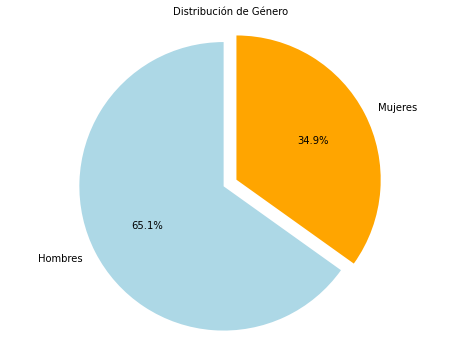

In [7]:
import matplotlib.pyplot as plt

# Contar la cantidad de cada categoría
counts = df['Genero'].value_counts()  # por ejemplo: {'Masculino': 60, 'Femenino': 40}

# Colores personalizados
colors = ['lightblue', 'orange']

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(counts, labels = ['Hombres', 'Mujeres'], autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05,0.05])
plt.title('Distribución de Género', fontsize=10)
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [8]:
df.Educacion.value_counts()

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Educacion, dtype: int64

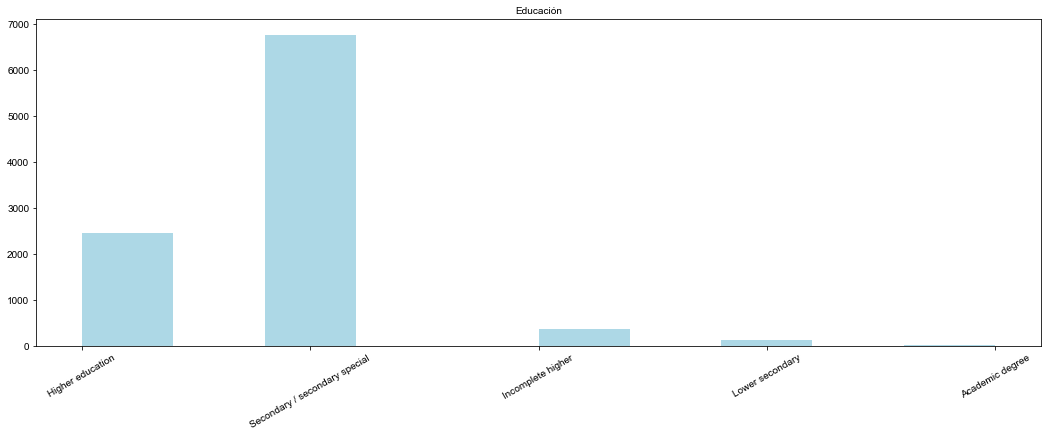

<Figure size 576x396 with 0 Axes>

In [9]:
df['Educacion'].hist(bins=10, color='lightblue') # Vemos graficamente su distribución
plt.title('Educación', fontsize=10)
plt.grid(False)

plt.gcf().set_size_inches(18, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [10]:
df.Hijos.value_counts()

0     6819
1     1886
2      852
3      126
4       18
5        5
19       1
14       1
7        1
Name: Hijos, dtype: int64

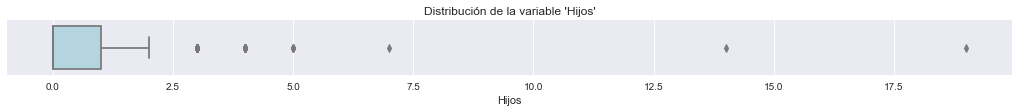

In [11]:
plt.figure(figsize=(18, 1))  
sns.boxplot(x=df['Hijos'], color="lightblue")
plt.title("Distribución de la variable 'Hijos'")
plt.show()

In [12]:
# Para intentar corregir estos valores extremos los reemplazo por otros mas habituales entendiendo que son pocos los outliers.
df.Hijos = df.Hijos.replace([19], 3)
df.Hijos = df.Hijos.replace([14], 2)
df.Hijos = df.Hijos.replace([7], 1)

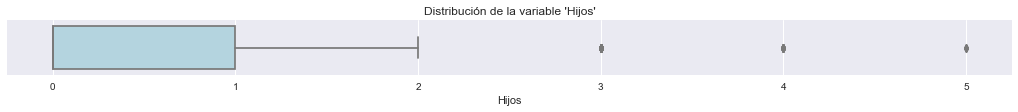

In [13]:
plt.figure(figsize=(18, 1))  
sns.boxplot(x=df['Hijos'], color="lightblue")
plt.title("Distribución de la variable 'Hijos'")
plt.show()

In [14]:
df.Hijos.value_counts()

0    6819
1    1887
2     853
3     127
4      18
5       5
Name: Hijos, dtype: int64

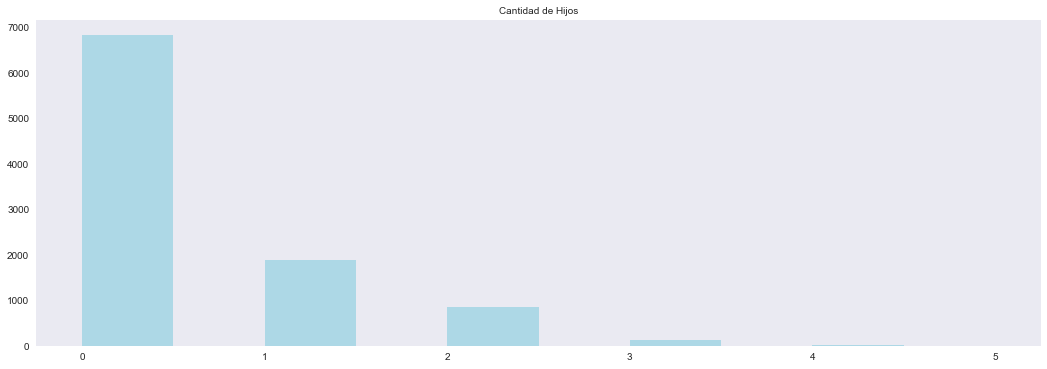

<Figure size 576x396 with 0 Axes>

In [15]:
df['Hijos'].hist(bins=10, color='lightblue') # Vemos graficamente su distribución
plt.title('Cantidad de Hijos', fontsize=10)
plt.grid(False)

plt.gcf().set_size_inches(18, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)

plt.show()
plt.clf()

In [16]:
df.describe()

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.419302,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.728208,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


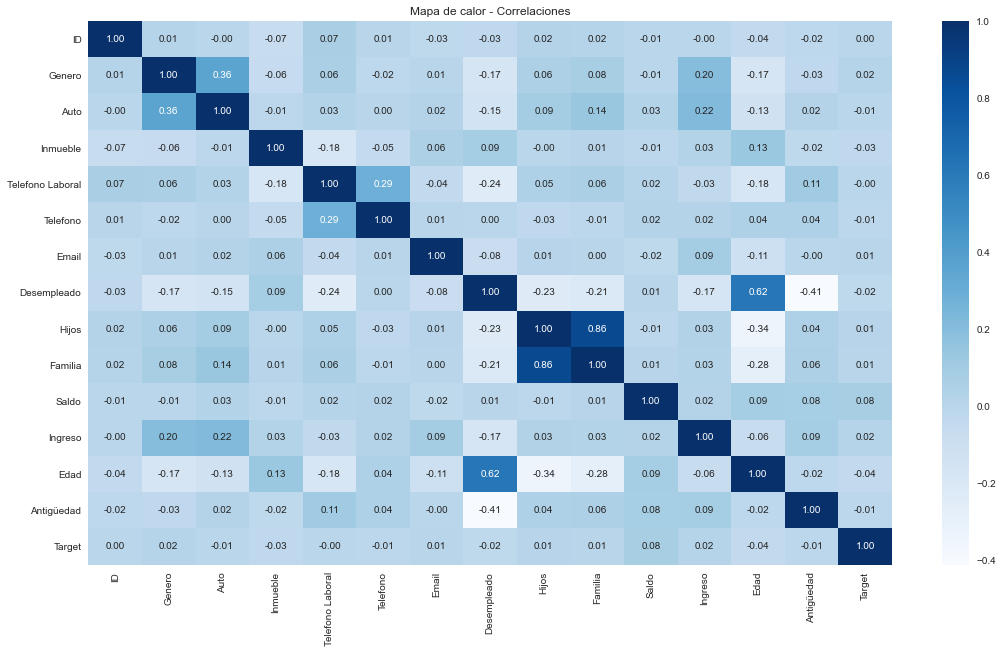

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mapa de calor - Correlaciones')
plt.show()

## <div style = 'background-color:Lightblue'> <center><font color='white'>② Preparación y limpieza de los datos </font></div>
  
En esta etapa se realiza la preparación del conjunto de datos para el modelado.
El objetivo es garantizar que la información sea coherente, completa y utilizable por los algoritmos de aprendizaje automático.
Se incluyen tareas:
- Tratamiento de valores faltantes.
- Codificación de variables categóricas.
- Escalado o normalización de variables numéricas.    
De este modo, los datos quedarán listos para desarrollar modelos confiables y precisos.

In [18]:
# Chequeo de valores nulos
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [19]:
df.dtypes

ID                    int64
Genero                int64
Auto                  int64
Inmueble              int64
Telefono Laboral      int64
Telefono              int64
Email                 int64
Desempleado           int64
Hijos                 int64
Familia               int64
Saldo                 int64
Ingreso             float64
Edad                float64
Antigüedad          float64
Tipo de Ingreso      object
Educacion            object
Estado Civil         object
Tipo de Casa         object
Empleo               object
Target                int64
dtype: object

In [20]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
9009,5142698,0,1,0,1,0,0,0,0,2,29,95850.0,51.831318,18.283743,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
5143,5088805,1,1,1,1,1,0,0,0,2,12,225000.0,37.558608,10.113828,State servant,Secondary / secondary special,Married,House / apartment,High skill tech staff,0
787,5023407,0,0,1,0,1,0,0,0,2,11,135000.0,54.147587,15.058489,Working,Secondary / secondary special,Married,House / apartment,Cooking staff,0


In [21]:
# La variable "Edad" y "Antiguedad" presentan valores con decimales, no es muy apropiado usar los con valores representados
# de esa forma, por lo que procedo a convertir a numeros enteros.

In [22]:
df['Edad'] = df['Edad'].round(0).astype(int)
# round(0) para redondear
# astype(int) convierte en enteros asi no quedan decimales
df['Antigüedad'] = df['Antigüedad'].round(0).astype(int)

In [23]:
df['Target'].value_counts()

0    8426
1    1283
Name: Target, dtype: int64

In [24]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
2887,5045286,0,0,1,0,0,0,0,0,1,37,67500.0,48,25,Working,Secondary / secondary special,Single / not married,House / apartment,Medicine staff,1
817,5023594,1,0,1,0,0,0,1,0,2,34,135000.0,63,0,Pensioner,Secondary / secondary special,Married,House / apartment,Other,0
758,5023257,1,1,1,0,0,0,0,0,2,40,180000.0,58,5,Commercial associate,Secondary / secondary special,Married,House / apartment,Drivers,0
